In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [5]:
df=pd.read_csv("C:/Users/sridh/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.dropna(subset=['TotalCharges'],inplace=True)

In [16]:
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].dtype)

0
float64


In [33]:
df.columns = df.columns.str.strip()
df_encoded = df.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [35]:
df_encoded = pd.get_dummies(df_encoded, columns=[
    'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
], drop_first=True)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [38]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


print(" Logistic Regression Report:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression Report:
[[917 116]
 [159 215]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [40]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print(" Random Forest Report:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest Report:
[[924 109]
 [187 187]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



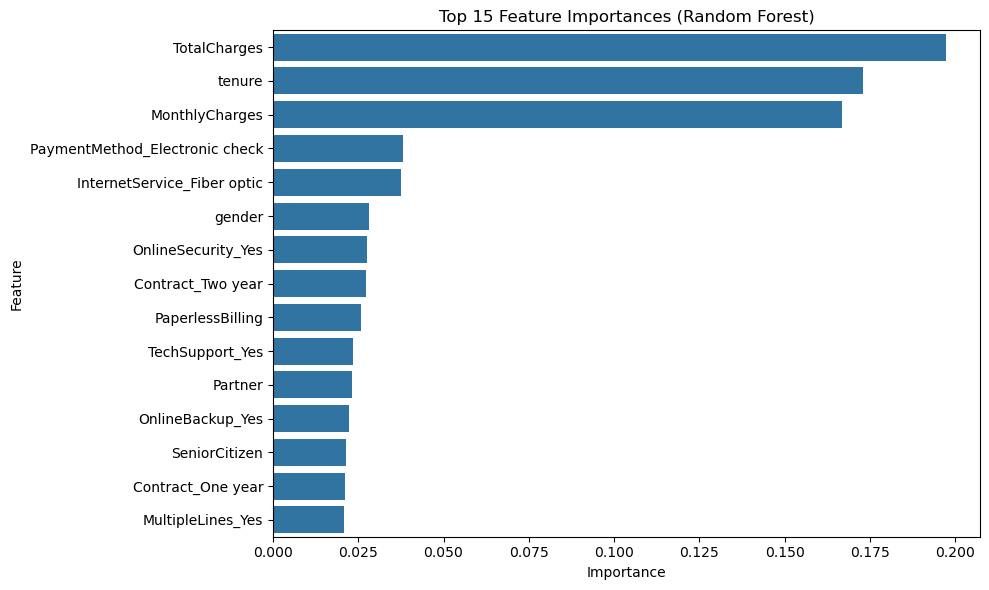

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = rf.feature_importances_
features = X.columns


top_indices = importances.argsort()[-15:][::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[top_indices], y=features[top_indices])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [42]:
import joblib


joblib.dump(rf, 'random_forest_churn_model.pkl')


joblib.dump(lr, 'logistic_regression_churn_model.pkl')


['logistic_regression_churn_model.pkl']

In [43]:
model = joblib.load('random_forest_churn_model.pkl')
